In [ ]:
import matplotlib as plt
import pandas as pd
import os
import string

In [ ]:
#data loader class
class CsvLoader:
  def __init__(self,path,filename):
    if os.getcwd() != path:
      os.chdir(path)   
    self.path = path
    self.filename = filename 
 
  def load_csv(self):
    df = pd.read_csv(self.filename,engine='python',error_bad_lines=False)
    return df
  

In [ ]:
csv_loader = CsvLoader('/content','processed_tweet_data.csv')
csv_loaded = csv_loader.load_csv()
csv_loaded[:10]

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",1.666667e-01,0.188889,en,548.0,612.0,ketuesriche,551,351,NaN,NaN,TelGlobalHealthWHOAFRO,Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,0.455556,en,195.0,92.0,Grid1949,66,92,NaN,NaN,globalhlthtwit,"Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,3.166667e-01,0.483333,en,2.0,1.0,LeeTomlinson8,1195,1176,NaN,red4research,NHSRDForumResearch2noteNHSRDForum,NaN
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",8.611111e-02,0.197222,en,1580.0,899.0,RIPNY08,2666,2704,NaN,NaN,HighWireTalk,NaN
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,2.800000e-01,0.620000,en,72.0,20.0,pash22,28250,30819,NaN,NaN,PeterHotez,United Kingdom
5,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus to...,5.083333e-01,0.783333,en,683.0,220.0,SandhraLee,759,4163,NaN,WeCanDoThisCOVID19,CDCDirector,USA
6,Fri Jun 18 17:56:44 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536.0,347.0,neilwalton48,221,599,NaN,NaN,RealJoelSmalley,NaN
7,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536.0,348.0,Candide62,154,1102,NaN,NaN,RealJoelSmalley,"Nord-Pas-de-Calais, France"
8,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,0.455556,en,197.0,93.0,AnneCar51323293,115,2030,NaN,NaN,globalhlthtwit,NaN
9,Fri Jun 18 17:56:47 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",It is really something to see new research com...,3.727273e-01,0.467424,en,3.0,1.0,DarkaDuna2014,94,144,NaN,Covid19,LongCovidNYC,"Bilbao, País Vasco"


In [ ]:
csv_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       3720 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      4785 non-null   float64
 7   retweet_count       4785 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  1518 non-null   object 
 12  hashtags            2655 non-null   object 
 13  user_mentions       5162 non-null   object 
 14  place               4088 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 765.6+

In [ ]:
class Prepare_data_sent_analysis:
  def __init__(self,df):
    self.df = df
  
  def text_category(self,p)-> str:
    if p > 0 :
      return 'positive'
    elif p < 0 :
      return 'negative'
    else:
      return 'neutral'
  
  
  def preprocess_data(self):
    df = self.df[self.df['lang'] =="en"]
    df['original_text'] = df['original_text'].astype(str)
    df['polarity'] = df['polarity'].astype(float)
    df['original_text'] = df['original_text'].apply(lambda x: x.lower())
    df['original_text'] = df['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    df_droped = df[df['original_text'] != 'nan'] 
    df_droped_cols = df_droped[['original_text','polarity']]
    df_droped_cols['score'] = df_droped_cols['polarity'].apply(lambda row: self.text_category(row))
    df_droped_cols.drop(df_droped_cols[df_droped_cols['score'] =='neutral'].index, inplace = True)
    df_droped_cols=df_droped_cols.reset_index(drop=True)
    return df_droped_cols
 

In [ ]:
data_topic_preparer = Prepare_data_sent_analysis(csv_loaded)
df_sent_analysis = data_topic_preparer.preprocess_data()
df_sent_analysis[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,original_text,polarity,score
0,🚨africa is in the midst of a fullblown third w...,1.666667e-01,positive
1,dr moeti is head of who in africa and one of t...,1.333333e-01,positive
2,thank you research2note for creating this amaz...,3.166667e-01,positive
3,former pfizer vp and virologist dr michael yea...,8.611111e-02,positive
4,i think it’s important that we don’t sell cova...,2.800000e-01,positive
5,i’m pleased to welcome the wecandothis bus to ...,5.083333e-01,positive
6,yet another amazingly qualified and courageous...,3.700743e-17,positive
7,yet another amazingly qualified and courageous...,3.700743e-17,positive
8,dr moeti is head of who in africa and one of t...,1.333333e-01,positive
9,it is really something to see new research com...,3.727273e-01,positive


In [ ]:
class data_visualization:
  def __init__(self,df):
    self.df = df
  
  def pie_chart(self):
    score_col = pd.Series(self.df['score'].value_counts(), index=['positive','negative','neutral'], name="score")
    score_col.plot.pie(figsize=(6, 6));

  def bar_chart(self):
    score_col = pd.Series(self.df['score'].value_counts(), index=['positive','negative','neutral'], name="score")
    score_col.plot.bar(figsize=(6, 6));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


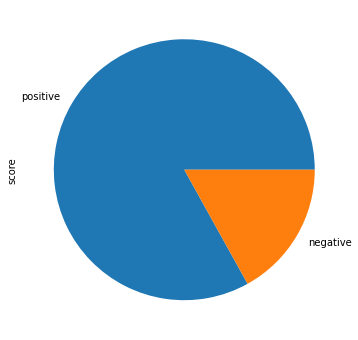

In [ ]:
visualizer = data_visualization(df_sent_analy)
visualizer.pie_chart()

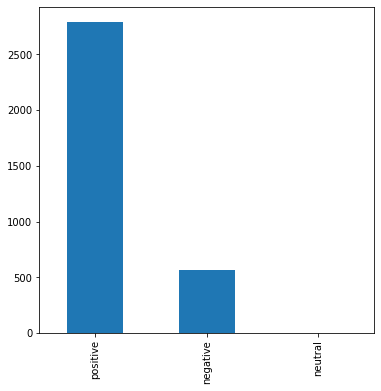

In [ ]:
visualizer.bar_chart()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [ ]:
def prepare_features(df):
    score_series = df['score'].map({'positive':1, 'negative':0})
    text_series = df['original_text']
    X = text_series.tolist()
    y = score_series.tolist()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)  
    return X_train, X_test, y_train, y_test



In [ ]:
X_train, X_test, y_train, y_test = prepare_features(df_sent_analy)
  

In [ ]:
def vectorize_features(x_train,x_test):
  trigram_vect = CountVectorizer(ngram_range=(3, 3))
  trigram_vect.fit(x_train)
  X_train_trigram = trigram_vect.transform(X_train)
  X_test_trigram = trigram_vect.transform(X_test)
  return X_train_trigram,X_test_trigram


In [ ]:
X_train_trigram,X_test_trigram = vectorize_features(X_train, X_test)


In [ ]:
from sklearn.linear_model import SGDClassifier
# training and predicting using the trained model
clf = SGDClassifier()
clf.fit(X_train_trigram, y_train)
y_pred = clf.predict(X_test_trigram)

In [ ]:
train_score = clf.score(X_train_trigram, y_train)
test_score = clf.score(X_test_trigram, y_test)
print("Train score: "+str(round(train_score, 2))+" ; Validation score: "+str(round(test_score, 2)))

In [ ]:
# Evaluate the model on the test data.
train_score = clf.score(X_train_trigram, y_train)
test_score = clf.score(X_test_trigram, y_test)
print("Train score: "+str(round(train_score, 2))+" ; Validation score: "+str(round(test_score, 2)))

precision_score = precision_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
print(f'The precision score is {precision_score} and the recall score is {recall_score}')

Train score: 1.0 ; Validation score: 0.98
The precision score is 0.9775277523442061 and the recall score is 0.9769001490312966


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision_score = precision_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
print(f'The precision score is {precision_score} and the recall score is {recall_score}')

The precision score is 0.9775277523442061 and the recall score is 0.9769001490312966
